## Ordinary Least Squares

### Simple Linear Model

$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i, ~~~~~ \epsilon_i \sim N(0, \sigma^2)$$

Simple Linear Model은 설명변수가 하나이고 종속변수가 하나인 단일 회귀 모형이다. 여기서 $\epsilon_i$는 오차인데, 오차는 평균이 0이고 분산이 $\sigma^2$인 정규분포를 따른다고 가정한다

이 경우 추정해야 하는 Parameter는 bias로 해석되는 $\beta_0$과 회귀계수인 $\beta_1$, 오차항의 분산인 $\sigma^2$으로 총 3개이다

한편, 단순회귀모형을 Network Model로 표현할 경우 다음과 같이 표현 가능하다

<center>

![SimpleRegression.png](Images/SimpleRegression.png)

</center>

즉, 가중치가 $\beta_1$이고 bias가 $\beta_0$인 Linear Machine Learning Model과 같다

#### example 1

Statsmodel을 통해 단순회귀분석을 시행해 보자. 여기서 간단하게 실업률과 물가상승률의 관계를 살펴보도록 한다

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
import warnings

warnings.filterwarnings('ignore')

START = '1999-01-01'
END = pd.to_datetime('today')

cpi = pdr.get_data_fred('CPIAUCSL', START, END) 
cpi.head()

,CPIAUCSL
DATE,
1999-01-01,164.7
1999-02-01,164.7
1999-03-01,164.8
1999-04-01,165.9
1999-05-01,166.0


In [37]:
inflation = cpi.pct_change(12).dropna()

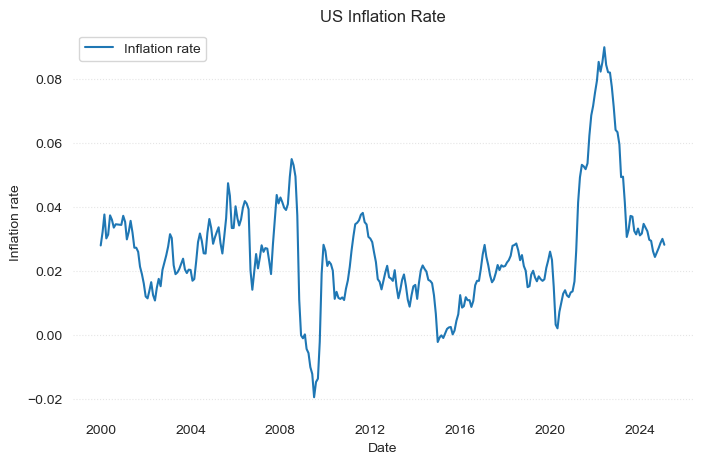

In [38]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(inflation, label = "Inflation rate")
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Inflation rate')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('US Inflation Rate')
plt.show()

In [39]:
unemployment = pdr.get_data_fred('UNRATE', '2000-01-01', END) * 0.01

In [40]:
unemployment.head()

,UNRATE
DATE,
2000-01-01,0.040
2000-02-01,0.041
2000-03-01,0.040
2000-04-01,0.038
2000-05-01,0.040


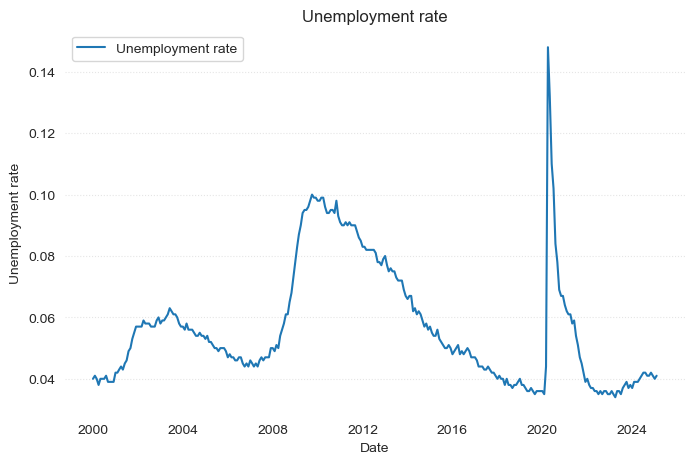

In [41]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(unemployment, label = "Unemployment rate")
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Unemployment rate')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Unemployment rate')
plt.show()

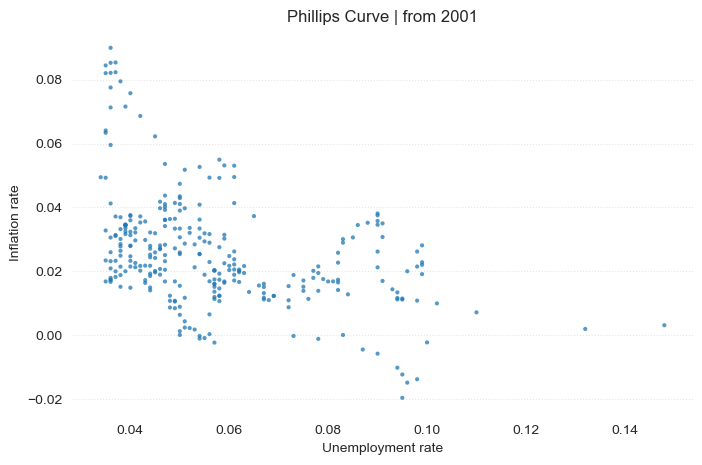

In [42]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(
    unemployment.loc[:'2024-06'], 
    inflation.loc[:'2024-06'],
    marker = '.',
    edgecolor = 'none',
    alpha = 0.75
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.ylabel('Inflation rate')
plt.xlabel('Unemployment rate')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Phillips Curve | from 2001')
plt.show()

단순회귀분석 $\mathrm{inflation}_i = \beta_0 + \beta_1 \mathrm{unemployment}_i + \epsilon_i$를 수행해 보자

In [43]:
matrix = pd.concat(
    [inflation, unemployment],
    axis = 1
).dropna()

In [44]:
import statsmodels.api as sm

X = matrix['CPIAUCSL']
X = sm.add_constant(X)
y = matrix['UNRATE']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 UNRATE   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     70.19
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           2.10e-15
Time:                        00:16:05   Log-Likelihood:                 791.43
No. Observations:                 302   AIC:                            -1579.
Df Residuals:                     300   BIC:                            -1571.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0694      0.002     38.377      0.0

$$\mathrm{inflation}_i = 0.0697 - 0.4839 \mathrm{unemployment}_i + \epsilon_i$$

$\beta_0 = 0.0694$, $\beta_1 = -0.4852$으로 추정되었다. 오차항에 대한 parameter는 아래와 같이 구할 수 있다

In [45]:
print(f'mean of error is {model.resid.mean() : .4f} and standard deviation of error is {model.resid.std() : .4f}')

mean of error is -0.0000 and standard deviation of error is  0.0176


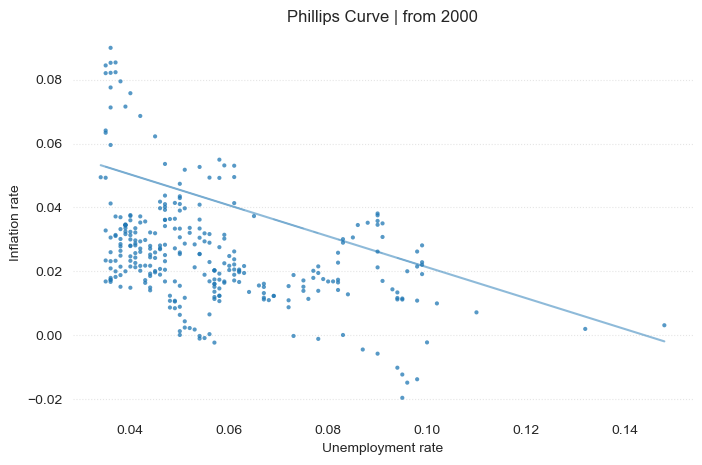

In [47]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(
    unemployment.loc[:'2025-02'], 
    inflation.loc[:'2025-02'],
    marker = '.',
    edgecolor = 'none',
    alpha = 0.75
)
sns.lineplot(
    x = matrix['UNRATE'].loc[:'2025-02'], 
    y = 0.0697 + matrix['UNRATE'].loc[:'2025-02'] * (-0.4839), 
    alpha = 0.5,
    ax = ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.ylabel('Inflation rate')
plt.xlabel('Unemployment rate')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Phillips Curve | from 2000')
plt.show()

`resid` 속성을 이용하면 잔차항의 분포를 확인할 수 있다.

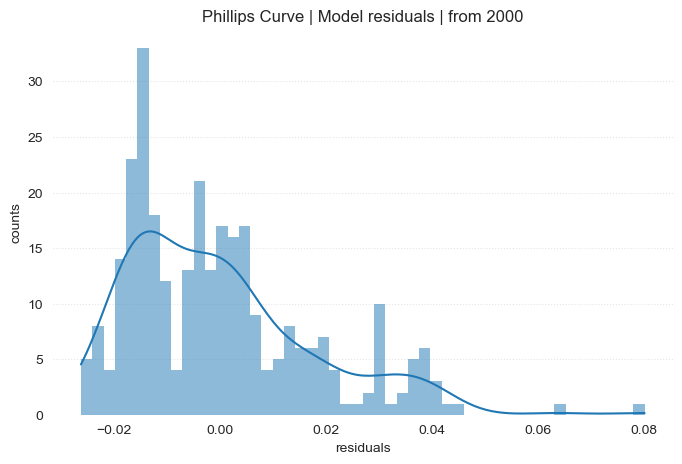

In [48]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.histplot(
    model.resid,
    edgecolor = 'none',
    kde = True,
    bins = 50
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.ylabel('counts')
plt.xlabel('residuals')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Phillips Curve | Model residuals | from 2000')
plt.show()

### Multiple Linear Model

$$y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \epsilon_i, ~~~~~ \epsilon_i \sim N(0, \sigma^2)$$

Multiple Linear Model은 설명변수가 두개 이상이고 종속변수가 하나인 다중 회귀 모형이다. 마찬가지로 오차는 평균이 0이고 분산이 $\sigma^2$인 정규분포를 따른다고 가정한다

이 경우 Parameter는 bias로 해석되는 $\beta_0$과 회귀계수인 $\beta_1, \beta_2$, 오차항의 분산인 $\sigma^2$으로 총 4개이다

설명변수가 하나씩 증가할수록 추정해야 하는 parameter는 1개씩 늘어나며, 이에 따라 회귀모형의 **자유도(degree of freedom) 또한 하나씩 증가**한다

한편, 다중회귀모형을 Network Model로 표현할 경우 다음과 같이 표현 가능하다

<center>

![MultiLinear.png](Images/MultipleLinearModel.png)

</center>

즉, 가중치가 각각 $\beta_1, \beta_2$이고 bias가 $\beta_0$인 Linear Machine Learning Model과 같다

#### example 2

Multiple Linear Regression 모형을 추정해 보자. Example 1에서 모기지 대출 금리를 추가하여 추정해 보도록 한다

In [49]:
mortgage = pdr.get_data_fred('MORTGAGE30US', START, END)
mortgage = mortgage.resample('M').mean().loc['2000':'2025-02'] * 0.01
mortgage.index = matrix.index

In [50]:
matrix = pd.concat(
    [matrix, mortgage],
    axis = 1
)

다중회귀분석 $\mathrm{inflation}_i = \beta_0 + \beta_1 \mathrm{unemployment}_i + \beta_2 \mathrm{interest}_i + \epsilon_i$를 수행해 보자

In [51]:
X = matrix[['UNRATE','MORTGAGE30US']]
X = sm.add_constant(X)
y = matrix['CPIAUCSL']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               CPIAUCSL   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     38.45
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           1.38e-15
Time:                        00:16:24   Log-Likelihood:                 826.91
No. Observations:                 302   AIC:                            -1648.
Df Residuals:                     299   BIC:                            -1637.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0371      0.005      6.916   

$$\mathrm{inflation}_i = 0.0370 - 0.3490 \mathrm{unemployment}_i + 0.1650 \mathrm{interest}_i + \epsilon_i$$

plotly를 사용하면 spline을 구현할 수 있다. 아래는 Linear Regression을 상속받아 새로운 class myLinearRrgression를 정의하여 사용하도록 한다

In [52]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

class myLinearRegression(LinearRegression):
    def __init__(self, fit_intercept = True, copy_X = True, n_jobs = None):
        super().__init__(fit_intercept = fit_intercept, 
                         copy_X = copy_X, 
                         n_jobs = n_jobs)
    
    def mySpline(self, poly,
                 data : pd.DataFrame, x1 : str, x2 : str, 
                 y : str, title : str, 
                 xaxis_title : str, 
                 yaxis_title : str, 
                 zaxis_title : str, 
                 color : str = None,
                 scatter_opacity : float = 0.7,
                 scatter : bool = False) -> go :
        xrange_1 = np.linspace(data[x1].min(), data[x1].max(), 100)
        xrange_2 = np.linspace(data[x2].min(), data[x2].max(), 100)
        value1, value2 = np.meshgrid(xrange_1, xrange_2)
            
        X_plot = np.column_stack((value1.ravel(), value2.ravel()))
        X_plot_poly = poly.transform(X_plot)
            
        predicted_values = self.predict(X_plot_poly)
        
        if scatter == False :
            fig = go.Figure(data = [go.Surface(z = predicted_values.reshape(value1.shape),
                                               x = value1,
                                               y = value2)])
        
            fig.update_layout(title = title,
                              scene = dict(xaxis_title = xaxis_title,
                                           yaxis_title = yaxis_title,
                                           zaxis_title = zaxis_title))
            return fig
        else : 
            scatter_fig = px.scatter_3d(data,
                                        x = x1,
                                        y = x2,
                                        z = y,
                                        color = color,
                                        opacity = scatter_opacity)
            scatter_data = scatter_fig.data[0]
            
            surface_fig = go.Figure(data = [go.Surface(z = predicted_values.reshape(value1.shape),
                                                       x = value1,
                                                       y = value2)])
            surface_data = surface_fig.data[0]
            
            combined_fig = go.Figure(data = [scatter_data, surface_data])
            combined_fig.update_layout(
                title=title,
                scene=dict(
                    xaxis_title=xaxis_title,
                    yaxis_title=yaxis_title,
                    zaxis_title=zaxis_title
                ),
                width=800, 
                height=600
            )
            return combined_fig

In [53]:
polynomial = PolynomialFeatures(degree = 2)
X_poly = polynomial.fit_transform(matrix[['UNRATE','MORTGAGE30US']])
polymodel = myLinearRegression().fit(X_poly, matrix['CPIAUCSL'])

In [54]:
polymodel.mySpline(
    poly = polynomial,
    data = matrix,
    x1 = 'UNRATE', 
    x2 = 'MORTGAGE30US', 
    y = 'CPIAUCSL',
    title = 'Estimated Inflation Spline',
    xaxis_title = 'unemployment rate',
    yaxis_title = 'interest rate',
    zaxis_title = 'inflation rate',
    scatter = True,
    color = 'CPIAUCSL'
)

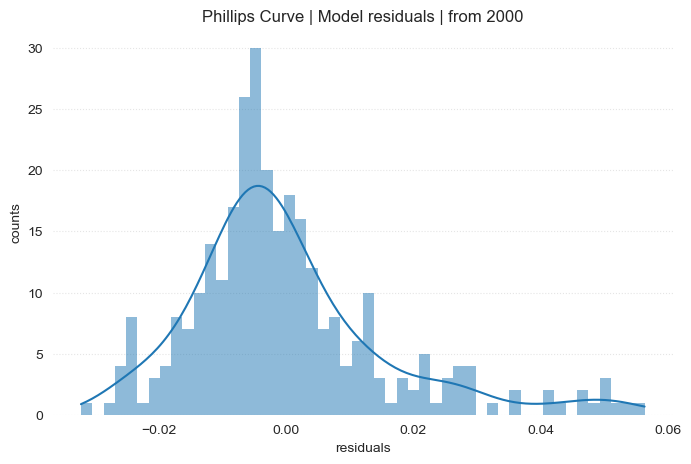

In [55]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.histplot(
    model.resid,
    edgecolor = 'none',
    kde = True,
    bins = 50
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.ylabel('counts')
plt.xlabel('residuals')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Phillips Curve | Model residuals | from 2000')
plt.show()

### 3. Multivariate Linear Model

$$\begin{pmatrix} y_{1i} \\ y_{2i} \end{pmatrix} = \begin{pmatrix} \beta_{10} \\ \beta_{20} \end{pmatrix} + 
\begin{pmatrix} \beta_{11} & \beta_{12} \\ \beta_{21} & \beta_{22} \end{pmatrix} \begin{pmatrix} x_{1i} \\ x_{2i} \end{pmatrix} +
\begin{pmatrix} \epsilon_{1i} \\ \epsilon_{2i} \end{pmatrix}, ~~~~~ 
\begin{pmatrix} \epsilon_{1i} \\ \epsilon_{2i} \end{pmatrix} \sim N\Big(0, \begin{pmatrix} \sigma_{11} & \sigma_{12} \\ \sigma_{21} & \sigma_{22} \end{pmatrix}\Big)$$

Multivariate Linear Model은 설명변수가 두개 이상이고 종속변수도 두 개 이상인 다변량 회귀 모형이다. 

오차항은 Gaussian 계열 분포를 따르고, 분산은 $\Sigma^2$로 생각하면 된다. 다변량 정규분포의 이점은 두 관측집단간 **공분산**이 추정된다는 것이다

한편, 다변량 회귀모형을 Network Model로 표현할 경우 다음과 같이 표현 가능하다

<center>

![multinomial.png](Images/multinomial.png)

</center>

즉, 가중치가 각각 $\beta_1, \beta_2$이고 bias가 $\beta_0$인 MultiClass Machine Learning Model과 같다.

In [56]:
import yfinance as yf

sp500 = yf.download(
    '^GSPC',
    start = START,
    interval = '1mo',
    progress = False,
    auto_adjust=True,
    multi_level_index=False
)

In [57]:
matrix = pd.concat(
    [matrix, sp500.pct_change(12).loc[:'2025-02', 'Close'].dropna()],
    axis = 1
)

In [59]:
from linearmodels.system import SUR

matrix['const'] = 1
formula = {
    'y1': 'CPIAUCSL ~ const + UNRATE + MORTGAGE30US',
    'y2': 'Close ~ const + UNRATE + MORTGAGE30US'
}

sur_model = SUR.from_formula(formula, matrix)
sur_results = sur_model.fit()

print(sur_results.summary)

                           System GLS Estimation Summary                           
Estimator:                        GLS   Overall R-squared:                   0.0944
No. Equations.:                     2   McElroy's R-squared:                 0.1582
No. Observations:                 302   Judge's (OLS) R-squared:             0.0944
Date:                Thu, Mar 13 2025   Berndt's R-squared:                  0.2864
Time:                        00:16:43   Dhrymes's R-squared:                 0.0944
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                   Equation: y1, Dependent Variable: CPIAUCSL                   
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
const            0.0371     0.0068     5.4584     0.0000      0.0238      0.0505
UNRA

$$\mathrm{inflation}_i = 0.0371 - 0.3490 \mathrm{unemployment}_i + 0.1650 \mathrm{interest}_i + \epsilon_i$$
$$\mathrm{stock~return}_i = 0.3352 - 1.0957 \mathrm{unemployment}_i - 3.8714 \mathrm{interest}_i + \epsilon_i$$

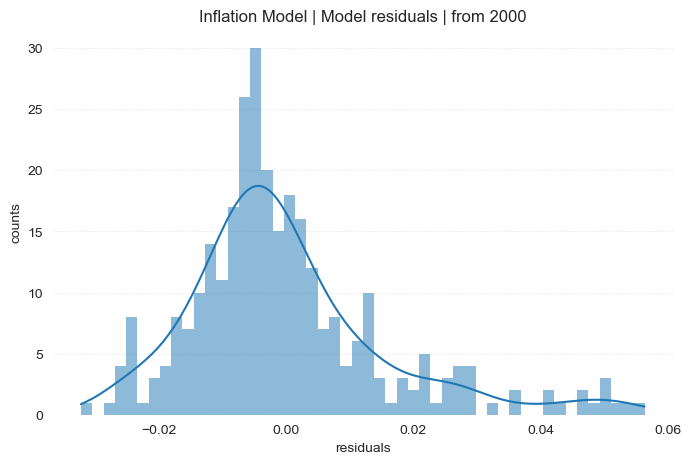

In [60]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.histplot(
    sur_results.resids['y1'],
    edgecolor = 'none',
    kde = True,
    bins = 50
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.ylabel('counts')
plt.xlabel('residuals')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Inflation Model | Model residuals | from 2000')
plt.show()

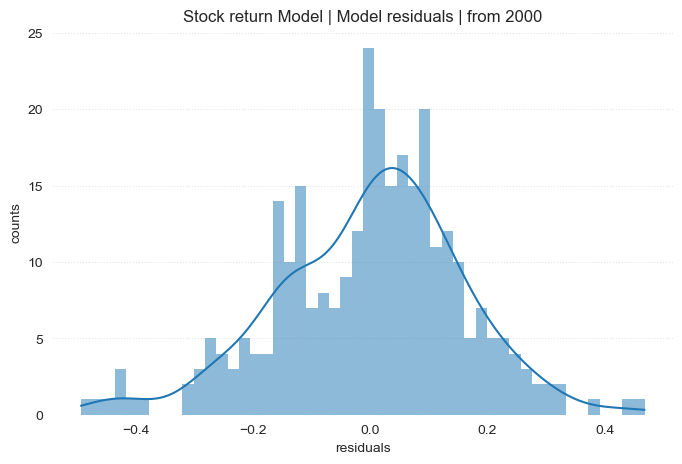

In [61]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.histplot(
    sur_results.resids['y2'],
    edgecolor = 'none',
    kde = True,
    bins = 50
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.ylabel('counts')
plt.xlabel('residuals')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Stock return Model | Model residuals | from 2000')
plt.show()